<a href="https://colab.research.google.com/github/nima34366/ECG_Classification/blob/main/ECG_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import auth
import uuid
auth.authenticate_user()
!gcloud config set project warm-canto-314907

Updated property [core/project].


In [2]:
import os

import tensorflow as tf
print("Tensorflow version " + tf.__version__)

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.TPUStrategy(tpu)

Tensorflow version 2.5.0
Running on TPU  ['10.18.110.114:8470']
INFO:tensorflow:Initializing the TPU system: grpc://10.18.110.114:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.18.110.114:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [ ]:
#@title Model 1

import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization, Add
from tensorflow.keras.models import Model

def create_model():
    # Build the model using the functional API
    i = Input((256,256,12))
    # x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
    # x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
    # x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)

    x = Conv2D(1024, (64, 128))(i)
    y = Conv2D(1024, (64, 204))(i)

    x=Flatten()(x)
    y=Flatten()(x)

    f=Add()([x,y])

    f=Dense(2048,activation='relu')(f)
    f=Dense(1024,activation='relu')(f)
    f=Dense(256,activation='relu')(f)
    f = Dense(26, activation='sigmoid')(f)


    # x = BatchNormalization()(x)
    # x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    # x = BatchNormalization()(x)
    # x = MaxPooling2D((2, 2))(x)
    # # x = Dropout(0.2)(x)
    # x = Conv2D(128,(3, 3), activation='relu', padding='same')(x)
    # x = BatchNormalization()(x)
    # x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    # x = BatchNormalization()(x)
    # x = MaxPooling2D((2, 2))(x)
    # # x = Dropout(0.2)(x)
    # x = Conv2D(256, (5, 5), activation='relu', padding='same')(x)
    # x = BatchNormalization()(x)
    # x = Conv2D(256, (5, 5), activation='relu', padding='same')(x)
    # x = BatchNormalization()(x)
    # x = MaxPooling2D((2, 2))(x)
    # # x = Dropout(0.2)(x)

    # x = Conv2D(512, (5, 5), activation='relu', padding='same')(x)
    # x = BatchNormalization()(x)
    # x = Conv2D(512, (5, 5), activation='relu', padding='same')(x)
    # x = BatchNormalization()(x)
    # x = MaxPooling2D((2, 2))(x)

    # x = GlobalMaxPooling2D()(x)
    # x = Flatten()(x)
    # x = Dropout(0.2)(x)
    # x = Dense(2048, activation='relu')(x)
    # x = Dropout(0.2)(x)
    # x = Dense(1024, activation='relu')(x)
    # x = Dropout(0.2)(x)
    # x = Dense(26, activation='sigmoid')(x)

    model = Model(i, f)

    return model


with tpu_strategy.scope():
    model = create_model()
    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.summary()

In [ ]:
#@title Default Inc Res 
!pip install tensorflow-addons
import tensorflow_addons as tfa
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, GlobalAveragePooling2D, Dropout, GlobalMaxPooling2D, concatenate, MaxPooling2D, BatchNormalization, Add, ReLU, Activation
from tensorflow.keras.models import Model

def create_model():

    # Stem
    def Stem(i):
        x = Conv2D(32, (3,3), strides=(1,2), activation = 'relu',kernel_initializer='he_uniform')(i)
        x = Conv2D(32, (3,3), activation = 'relu',kernel_initializer='he_uniform')(x)
        x = Conv2D(64, (3,3), activation = 'relu',kernel_initializer='he_uniform')(x)

        y = Conv2D(96, (3,3), strides=(1,2), activation = 'relu',kernel_initializer='he_uniform')(x)

        z = MaxPooling2D((3,3), strides=(1,2))(x)

        x = concatenate([y,z])

        y = Conv2D(64, (1,1), padding='same', activation = 'relu',kernel_initializer='he_uniform')(x)
        y = Conv2D(64, (7,1), padding='same', activation = 'relu',kernel_initializer='he_uniform')(y)
        y = Conv2D(64, (1,7), padding='same', activation = 'relu',kernel_initializer='he_uniform')(y)
        y = Conv2D(96, (3,3), activation = 'relu',kernel_initializer='he_uniform')(y)

        z = Conv2D(64, (1,1), padding='same', activation = 'relu',kernel_initializer='he_uniform')(x)
        z = Conv2D(96, (3,3), activation = 'relu',kernel_initializer='he_uniform')(z)

        x = concatenate([y,z])

        y = MaxPooling2D((3,3), strides=(1,2))(x)

        z = Conv2D(192, (3,3), strides=(1,2), activation = 'relu',kernel_initializer='he_uniform')(x)

        x = concatenate([y,z])

        x = BatchNormalization()(x)

        return x

    # Inception Resnet A
    def Inception_resnet_A(x):
        x = ReLU()(x)

        y = Conv2D(32, (1,1), padding='same', activation = 'relu',kernel_initializer='he_uniform')(x)

        z = Conv2D(32, (1,1), padding='same', activation = 'relu',kernel_initializer='he_uniform')(x)
        z = Conv2D(32, (3,3), padding='same')(z)

        a = Conv2D(32, (1,1), padding='same', activation = 'relu',kernel_initializer='he_uniform')(x)
        a = Conv2D(48, (3,3), padding='same', activation = 'relu',kernel_initializer='he_uniform')(a)
        a = Conv2D(64, (3,3), padding='same', activation = 'relu',kernel_initializer='he_uniform')(a)

        y = concatenate([y,z,a])

        y = Conv2D(384, (1,1), activation = 'relu',kernel_initializer='he_uniform')(y)

        x = Add()([x,y])

        x = ReLU()(x)

        x = BatchNormalization()(x)
        return x

    #Reduction A
    def Reduction_A(x, k, l, m, n):

        y = Conv2D(k, (1,1), padding='same',activation = 'relu',kernel_initializer='he_uniform')(x)
        y = Conv2D(l, (3,3), padding='same',activation = 'relu',kernel_initializer='he_uniform')(y)
        y = Conv2D(m, (3,3), strides=(1,3),activation = 'relu',kernel_initializer='he_uniform')(y)

        a = Conv2D(n, (3,3), strides=(1,3),activation = 'relu',kernel_initializer='he_uniform')(x)

        z = MaxPooling2D((3,3), strides=(1,3))(x)
        
        x = concatenate([y,a,z])

        x = BatchNormalization()(x)
        return x

    #Inception Resnet B
    def Inception_Resnet_B(x):
        x = ReLU()(x)

        y = Conv2D(192,(1,1), padding='same',activation = 'relu',kernel_initializer='he_uniform')(x)

        z = Conv2D(128,(1,1), padding='same',activation = 'relu',kernel_initializer='he_uniform')(x)
        z = Conv2D(160,(1,7), padding='same',activation = 'relu',kernel_initializer='he_uniform')(z)
        z = Conv2D(192,(7,1), padding='same',activation = 'relu',kernel_initializer='he_uniform')(z)

        y = concatenate([y,z])
        y = Conv2D(1152,(1,1),activation='relu',kernel_initializer='he_uniform')(y)

        x = Add()([y,x])

        x = ReLU()(x)
        x = BatchNormalization()(x)
        return x

    #Reduction B
    def Reduction_B(x):

        y = Conv2D(256, (1,1), padding='same',activation = 'relu',kernel_initializer='he_uniform')(x)
        y = Conv2D(288, (3,3), padding='same',activation = 'relu',kernel_initializer='he_uniform')(y)
        y = Conv2D(320, (3,3), strides=(2,2),activation = 'relu',kernel_initializer='he_uniform')(y)

        z = Conv2D(256, (1,1), padding='same',activation = 'relu',kernel_initializer='he_uniform')(x)
        z = Conv2D(288, (3,3), strides=(2,2),activation = 'relu',kernel_initializer='he_uniform')(z)

        a = Conv2D(256, (1,1), padding='same',activation = 'relu',kernel_initializer='he_uniform')(x)
        a = Conv2D(384, (3,3), strides=(2,2),activation = 'relu',kernel_initializer='he_uniform')(a)

        b = MaxPooling2D((3,3), strides=(2,2))(x)

        x = concatenate([y,z,a,b])
        x = BatchNormalization()(x)
        return x

    def Inception_Resnet_C(x):
        x = ReLU()(x)

        y = Conv2D(192, (1,1), padding='same',activation = 'relu',kernel_initializer='he_uniform')(x)
        y = Conv2D(224, (1,3), padding='same',activation = 'relu',kernel_initializer='he_uniform')(y)
        y = Conv2D(256, (3,1), padding='same',activation = 'relu',kernel_initializer='he_uniform')(y)

        z = Conv2D(192, (1,1), padding='same',activation = 'relu',kernel_initializer='he_uniform')(x)

        z = concatenate([y,z])
        z = Conv2D(2144,(1,1),activation='relu',kernel_initializer='he_uniform')(z)

        x = Add()([z,x])

        x = ReLU()(x)
        x = BatchNormalization()(x)

        return x 

    i = Input((32,256,12))
    x = Stem(i)
    x = Inception_resnet_A(x)
    x = Inception_resnet_A(x)
    x = Inception_resnet_A(x)
    x = Inception_resnet_A(x)
    x = Inception_resnet_A(x)

    x = Reduction_A(x,256,256,384,384)
    x = Inception_Resnet_B(x)
    x = Inception_Resnet_B(x)
    x = Inception_Resnet_B(x)
    x = Inception_Resnet_B(x)
    x = Inception_Resnet_B(x)
    x = Inception_Resnet_B(x)
    x = Inception_Resnet_B(x)
    x = Inception_Resnet_B(x)
    x = Inception_Resnet_B(x)
    x = Inception_Resnet_B(x)

    x = Reduction_B(x)
    x = Inception_Resnet_C(x)
    x = Inception_Resnet_C(x)
    x = Inception_Resnet_C(x)
    x = Inception_Resnet_C(x)
    x = Inception_Resnet_C(x)

    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.2)(x)
    # x = Dense(1024, activation = 'relu',kernel_initializer='he_uniform')(x)
    # x = Dropout(0.2)(x)
    f = Dense(26,activation = 'sigmoid',kernel_initializer='glorot_uniform')(x)
    model = Model(i, f)

    return model

weights_one = tf.convert_to_tensor([ 5.37243388 , 2.86427874 ,39.56075921, 85.12542291,  8.58473874 , 5.00240002, 6.43400672 , 9.36832447 , 2.38431391 , 7.07526212, 10.49046995 , 9.35389559,2.15820334 , 7.58013772 ,16.99059425 ,39.03468528,  8.39007717 ,76.24437229,9.30054919  ,7.58176926, 12.03282777, 10.52054835 , 2.69493069,  3.88933177,1.78487677  ,4.65925505])
weights_zeros = tf.convert_to_tensor([0.55130906, 0.60574049 ,0.50640029 ,0.50295419 ,0.53092246, 0.55552594,0.54213005 ,0.52819022, 0.63267428, 0.5380213  ,0.52502385, 0.52823616,0.65076559 ,0.53531005, 0.51516016, 0.50648766 ,0.53168537, 0.50330058,0.52840732 ,0.53530191, 0.52167725, 0.52494873 ,0.61389881, 0.57376085,0.69457119 ,0.56010692])

weights_one_dict={}
weights_zeros_dict={}
for i in range(len(weights_one)):
    weights_one_dict[i]=weights_one[i]
    weights_zeros_dict[i]=weights_zeros[i]

import tensorflow.keras.backend as K
def loss_fn(y_true,y_pred):
    # loss = K.square(y_true-y_pred)
    # loss = 0
    # loss -= (y_true[0]*K.log(y_pred[0]) + (1-y_true[0])*K.log(1-y_pred[0]))
    # loss -= (y_true[1]*K.log(y_pred[1]) + (1-y_true[1])*K.log(1-y_pred[1]))
    # loss -= (y_true[2]*K.log(y_pred[2]) + (1-y_true[2])*K.log(1-y_pred[2]))
    # loss -= (y_true[3]*K.log(y_pred[3]) + (1-y_true[3])*K.log(1-y_pred[3]))
    # loss -= (y_true[4]*K.log(y_pred[4]) + (1-y_true[4])*K.log(1-y_pred[4]))
    # loss -= (y_true[5]*K.log(y_pred[5]) + (1-y_true[5])*K.log(1-y_pred[5]))
    # loss -= (y_true[6]*K.log(y_pred[6]) + (1-y_true[6])*K.log(1-y_pred[6]))
    # loss -= (y_true[7]*K.log(y_pred[7]) + (1-y_true[7])*K.log(1-y_pred[7]))
    # loss -= (y_true[8]*K.log(y_pred[8]) + (1-y_true[8])*K.log(1-y_pred[8]))
    # loss -= (y_true[9]*K.log(y_pred[9]) + (1-y_true[9])*K.log(1-y_pred[9]))
    # loss -= (y_true[10]*K.log(y_pred[10]) + (1-y_true[10])*K.log(1-y_pred[10]))
    # loss -= (y_true[11]*K.log(y_pred[11]) + (1-y_true[11])*K.log(1-y_pred[11]))
    # loss -= (y_true[12]*K.log(y_pred[12]) + (1-y_true[12])*K.log(1-y_pred[12]))
    # loss -= (y_true[13]*K.log(y_pred[13]) + (1-y_true[13])*K.log(1-y_pred[13]))
    # loss -= (y_true[14]*K.log(y_pred[14]) + (1-y_true[14])*K.log(1-y_pred[14]))
    # loss -= (y_true[15]*K.log(y_pred[15]) + (1-y_true[15])*K.log(1-y_pred[15]))
    # loss -= (y_true[16]*K.log(y_pred[16]) + (1-y_true[16])*K.log(1-y_pred[16]))
    # loss -= (y_true[17]*K.log(y_pred[17]) + (1-y_true[17])*K.log(1-y_pred[17]))
    # loss -= (y_true[18]*K.log(y_pred[18]) + (1-y_true[18])*K.log(1-y_pred[18]))
    # loss -= (y_true[19]*K.log(y_pred[19]) + (1-y_true[19])*K.log(1-y_pred[19]))
    # loss -= (y_true[20]*K.log(y_pred[20]) + (1-y_true[20])*K.log(1-y_pred[20]))
    # loss -= (y_true[21]*K.log(y_pred[21]) + (1-y_true[21])*K.log(1-y_pred[21]))
    # loss -= (y_true[22]*K.log(y_pred[22]) + (1-y_true[22])*K.log(1-y_pred[22]))
    # loss -= (y_true[23]*K.log(y_pred[23]) + (1-y_true[23])*K.log(1-y_pred[23]))
    # loss -= (y_true[24]*K.log(y_pred[24]) + (1-y_true[24])*K.log(1-y_pred[24]))
    # loss -= (y_true[25]*K.log(y_pred[25]) + (1-y_true[25])*K.log(1-y_pred[25]))
    # return loss

    loss=0
    for i in range(26):
        loss += K.max(y_pred[:,i],0)-y_pred[:,i] * y_true[:,i] + K.log(1+K.exp((-1)*K.abs(y_pred[:,i])))
    return loss/26


def custom_binary_loss(y_true, y_pred): 
    # https://github.com/tensorflow/tensorflow/blob/v2.3.1/tensorflow/python/keras/backend.py#L4826
    y_pred = K.clip(y_pred, K.epsilon(), 1 - K.epsilon())
    
    term_0=0
    term_1=0
    for i in range(26):
        term_0 += (1 - y_true[:,i]) * K.log(1 - y_pred[:,i] + K.epsilon())  # Cancels out when target is 1 
        term_1 += y_true[:,i] * K.log(y_pred[:,i] + K.epsilon()) # Cancels out when target is 0

    return -(term_0 + term_1)/26

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=413,
    decay_rate=0.94)
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)


with tpu_strategy.scope():
    model = create_model()
    model.compile(optimizer=opt,loss=custom_binary_loss,metrics=['accuracy','AUC',tfa.metrics.F1Score(num_classes=26)])

model.summary()



# z * -log(sigmoid(x)) + (1 - z) * -log(1 - sigmoid(x))
# = z * -log(1 / (1 + exp(-x))) + (1 - z) * -log(exp(-x) / (1 + exp(-x)))
# = z * log(1 + exp(-x)) + (1 - z) * (-log(exp(-x)) + log(1 + exp(-x)))
# = z * log(1 + exp(-x)) + (1 - z) * (x + log(1 + exp(-x))
# = (1 - z) * x + log(1 + exp(-x))
# = x - x * z + log(1 + exp(-x))

In [3]:
#@title Requirements for GroupConv2D
import tensorflow as tf
from tensorflow.python.framework import tensor_shape
from tensorflow.python.keras.utils import conv_utils
import tensorflow.keras.activations as activations
import tensorflow.keras.regularizers as regularizers
import tensorflow.keras.initializers as initializers
import tensorflow.keras.constraints as constraints
from tensorflow.python.ops import array_ops
from tensorflow.python.ops import nn


class GroupConvBase(tf.keras.layers.Layer):

    def __init__(self, rank, filters, kernel_size, groups=1, strides=1, padding='VALID', data_format=None,
                 dilation_rate=1,
                 activation=None, use_bias=True, kernel_initializer='glorot_uniform',
                 bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None,
                 kernel_constraint=None, bias_constraint=None, **kwargs):
        super().__init__(activity_regularizer=activity_regularizer, **kwargs)
        if filters % groups != 0:
            raise ValueError("Groups must divide filters evenly, but got {}/{}".format(filters, groups))

        self.filters = filters
        self.groups = groups
        self.kernel_size = conv_utils.normalize_tuple(kernel_size, rank, 'kernel_size')
        self.data_format = data_format
        self.padding = padding
        self.strides = conv_utils.normalize_tuple(strides, rank, 'strides')
        self.dilation_rate = conv_utils.normalize_tuple(dilation_rate, rank, 'dilation_rate')
        self.activation = activations.get(activation)
        self.use_bias = use_bias
        self.kernel_initializer = initializers.get(kernel_initializer)
        self.bias_initializer = initializers.get(bias_initializer)
        self.kernel_regularizer = regularizers.get(kernel_regularizer)
        self.bias_regularizer = regularizers.get(bias_regularizer)
        self.kernel_constraint = constraints.get(kernel_constraint)
        self.bias_constraint = constraints.get(bias_constraint)

    def build(self, input_shape):
        input_shape = tensor_shape.TensorShape(input_shape)
        if conv_utils.normalize_data_format(self.data_format) == 'channels_first':
            channel_axis = 1
        else:
            channel_axis = -1
        if input_shape.dims[channel_axis].value is None:
            raise ValueError('The channel dimension of the inputs '
                             'should be defined. Found `None`.')
        input_dim = int(input_shape[channel_axis])
        kernel_shape = self.kernel_size + (input_dim // self.groups, self.filters)

        self.kernel = self.add_weight(
            name='kernel',
            shape=kernel_shape,
            initializer=self.kernel_initializer,
            regularizer=self.kernel_regularizer,
            constraint=self.kernel_constraint,
            trainable=True,
            dtype=self.dtype)
        if self.use_bias:
            self.bias = self.add_weight(
                name='bias',
                shape=(self.filters,),
                initializer=self.bias_initializer,
                regularizer=self.bias_regularizer,
                constraint=self.bias_constraint,
                trainable=True,
                dtype=self.dtype)
        else:
            self.bias = None

        self.built = True

    def call(self, inputs):
        outputs = tf.nn.conv2d(inputs, self.kernel, strides=self.strides,
                                       data_format=self.data_format, dilations=self.dilation_rate,
                                       name=self.name,
                                       padding=self.padding)

        if self.use_bias:
            if self.data_format == 'channels_first':
                if self.rank == 1:
                    # nn.bias_add does not accept a 1D input tensor.
                    bias = array_ops.reshape(self.bias, (1, self.filters, 1))
                    outputs += bias
                else:
                    outputs = nn.bias_add(outputs, self.bias, data_format='NCHW')
            else:
                outputs = nn.bias_add(outputs, self.bias, data_format='NHWC')

        if self.activation is not None:
            return self.activation(outputs)
        return outputs

    def get_config(self):
        config = {
            'filters': self.filters,
            'kernel_size': self.kernel_size,
            "groups": self.groups,
            'strides': self.strides,
            'padding': self.padding,
            'data_format': self.data_format,
            'dilation_rate': self.dilation_rate,
            'activation': activations.serialize(self.activation),
            'use_bias': self.use_bias,
            'kernel_initializer': initializers.serialize(self.kernel_initializer),
            'bias_initializer': initializers.serialize(self.bias_initializer),
            'kernel_regularizer': regularizers.serialize(self.kernel_regularizer),
            'bias_regularizer': regularizers.serialize(self.bias_regularizer),
            'activity_regularizer':
                regularizers.serialize(self.activity_regularizer),
            'kernel_constraint': constraints.serialize(self.kernel_constraint),
            'bias_constraint': constraints.serialize(self.bias_constraint)
        }
        return {list(super(GroupConvBase, self).get_config().items()) + list(config.items())}


class GroupConv2D(GroupConvBase):

    def __init__(self, filters, kernel_size,
                 groups, strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1, 1), activation=None,
                 use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None,
                 bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None,
                 **kwargs):
        super(GroupConv2D, self).__init__(rank=2,
                                          filters=filters, kernel_size=kernel_size, groups=groups, strides=strides,
                                          padding=padding.upper(),
                                          data_format=data_format, dilation_rate=dilation_rate,
                                          activation=activations.get(activation),
                                          use_bias=use_bias, kernel_initializer=initializers.get(kernel_initializer),
                                          bias_initializer=initializers.get(bias_initializer),
                                          kernel_regularizer=regularizers.get(kernel_regularizer),
                                          bias_regularizer=regularizers.get(bias_regularizer),
                                          activity_regularizer=regularizers.get(activity_regularizer),
                                          kernel_constraint=constraints.get(kernel_constraint),
                                          bias_constraint=constraints.get(bias_constraint),
                                          **kwargs)

In [19]:
#@title Inception Resnet GroupConv2D Architecture 
# import tensorflow as tf
# tf.compat.v1.disable_eager_execution()
!pip install tensorflow-addons
import tensorflow_addons as tfa
from tensorflow.keras.layers import Input, Dense, Flatten, GlobalAveragePooling2D, Dropout, GlobalMaxPooling2D, concatenate, MaxPooling2D, BatchNormalization, Add, ReLU, Activation
from tensorflow.keras.models import Model

def create_model():

    # Stem
    def Stem(i):
        x = GroupConv2D(24, (3,3), 12, strides=(1,2), activation = 'relu',kernel_initializer='he_uniform')(i)
        x = GroupConv2D(24, (3,3), 12, activation = 'relu',kernel_initializer='he_uniform')(x)
        x = GroupConv2D(72, (3,3), 12, padding='same', activation = 'relu',kernel_initializer='he_uniform')(x)

        y = GroupConv2D(96, (3,3), 12, strides=(1,2), activation = 'relu',kernel_initializer='he_uniform')(x)

        z = MaxPooling2D((3,3), strides=(1,2))(x)

        x = concatenate([y,z])

        y = GroupConv2D(72, (1,1), 12, padding='same', activation = 'relu',kernel_initializer='he_uniform')(x)
        y = GroupConv2D(72, (7,1), 12, padding='same', activation = 'relu',kernel_initializer='he_uniform')(y)
        y = GroupConv2D(72, (1,7), 12, padding='same', activation = 'relu',kernel_initializer='he_uniform')(y)
        y = GroupConv2D(96, (3,3), 12, activation = 'relu',kernel_initializer='he_uniform')(y)

        z = GroupConv2D(72, (1,1), 12, padding='same', activation = 'relu',kernel_initializer='he_uniform')(x)
        z = GroupConv2D(96, (3,3), 12, activation = 'relu',kernel_initializer='he_uniform')(z)

        x = concatenate([y,z])

        y = MaxPooling2D((3,3), strides=(1,2))(x)

        z = GroupConv2D(192, (3,3), 12, strides=(1,2), activation = 'relu',kernel_initializer='he_uniform')(x)

        x = concatenate([y,z])

        x = BatchNormalization()(x)

        return x

    # Inception Resnet A
    def Inception_resnet_A(x):
        x = ReLU()(x)

        y = GroupConv2D(24, (1,1), 12, padding='same', activation = 'relu',kernel_initializer='he_uniform')(x)

        z = GroupConv2D(24, (1,1), 12, padding='same', activation = 'relu',kernel_initializer='he_uniform')(x)
        z = GroupConv2D(24, (3,3), 12, padding='same')(z)

        a = GroupConv2D(24, (1,1), 12, padding='same', activation = 'relu',kernel_initializer='he_uniform')(x)
        a = GroupConv2D(48, (3,3), 12, padding='same', activation = 'relu',kernel_initializer='he_uniform')(a)
        a = GroupConv2D(72, (3,3), 12, padding='same', activation = 'relu',kernel_initializer='he_uniform')(a)

        y = concatenate([y,z,a])

        y = GroupConv2D(384, (1,1), 12, activation = 'relu',kernel_initializer='he_uniform')(y)

        x = Add()([x,y])

        x = ReLU()(x)

        x = BatchNormalization()(x)
        return x

    #Reduction A
    def Reduction_A(x, k, l, m, n):

        y = GroupConv2D(k, (1,1), 12, padding='same',activation = 'relu',kernel_initializer='he_uniform')(x)
        y = GroupConv2D(l, (3,3), 12, padding='same',activation = 'relu',kernel_initializer='he_uniform')(y)
        y = GroupConv2D(m, (3,3), 12, strides=(2,2),activation = 'relu',kernel_initializer='he_uniform')(y)

        a = GroupConv2D(n, (3,3), 12, strides=(2,2),activation = 'relu',kernel_initializer='he_uniform')(x)

        z = MaxPooling2D((3,3), strides=(2,2))(x)
        
        x = concatenate([y,a,z])

        x = BatchNormalization()(x)
        return x

    #Inception Resnet B
    def Inception_Resnet_B(x):
        x = ReLU()(x)

        y = GroupConv2D(192,(1,1), 12, padding='same',activation = 'relu',kernel_initializer='he_uniform')(x)

        z = GroupConv2D(120,(1,1), 12, padding='same',activation = 'relu',kernel_initializer='he_uniform')(x)
        z = GroupConv2D(144,(1,7), 12, padding='same',activation = 'relu',kernel_initializer='he_uniform')(z)
        z = GroupConv2D(192,(7,1), 12, padding='same',activation = 'relu',kernel_initializer='he_uniform')(z)

        y = concatenate([y,z])
        y = GroupConv2D(1152,(1,1), 12, activation='relu',kernel_initializer='he_uniform')(y)

        x = Add()([y,x])

        x = ReLU()(x)
        x = BatchNormalization()(x)
        return x

    #Reduction B
    def Reduction_B(x):

        y = GroupConv2D(264, (1,1), 12, padding='same',activation = 'relu',kernel_initializer='he_uniform')(x)
        y = GroupConv2D(288, (3,3), 12, padding='same',activation = 'relu',kernel_initializer='he_uniform')(y)
        y = GroupConv2D(324, (3,3), 12, strides=(2,2),activation = 'relu',kernel_initializer='he_uniform')(y)

        z = GroupConv2D(264, (1,1), 12, padding='same',activation = 'relu',kernel_initializer='he_uniform')(x)
        z = GroupConv2D(288, (3,3), 12, strides=(2,2),activation = 'relu',kernel_initializer='he_uniform')(z)
 
        a = GroupConv2D(264, (1,1), 12, padding='same',activation = 'relu',kernel_initializer='he_uniform')(x)
        a = GroupConv2D(384, (3,3), 12, strides=(2,2),activation = 'relu',kernel_initializer='he_uniform')(a)

        b = MaxPooling2D((3,3), strides=(2,2))(x)

        x = concatenate([y,z,a,b])
        x = BatchNormalization()(x)
        return x

    def Inception_Resnet_C(x):
        x = ReLU()(x)

        y = GroupConv2D(192, (1,1), 12, padding='same',activation = 'relu',kernel_initializer='he_uniform')(x)
        y = GroupConv2D(240, (1,3), 12, padding='same',activation = 'relu',kernel_initializer='he_uniform')(y)
        y = GroupConv2D(264, (3,1), 12, padding='same',activation = 'relu',kernel_initializer='he_uniform')(y)

        z = GroupConv2D(192, (1,1), 12, padding='same',activation = 'relu',kernel_initializer='he_uniform')(x)

        z = concatenate([y,z])
        z = GroupConv2D(2148,(1,1), 12, activation='relu',kernel_initializer='he_uniform')(z)

        x = Add()([z,x])

        x = ReLU()(x)
        x = BatchNormalization()(x)

        return x 

    i = Input((32,256,12))
    x = Stem(i)
    x = Inception_resnet_A(x)
    x = Inception_resnet_A(x)
    x = Inception_resnet_A(x)
    x = Inception_resnet_A(x)
    x = Inception_resnet_A(x)

    x = Reduction_A(x,264,264,384,384)
    x = Inception_Resnet_B(x)
    x = Inception_Resnet_B(x)
    x = Inception_Resnet_B(x)
    x = Inception_Resnet_B(x)
    x = Inception_Resnet_B(x)
    x = Inception_Resnet_B(x)
    x = Inception_Resnet_B(x)
    x = Inception_Resnet_B(x)
    x = Inception_Resnet_B(x)
    x = Inception_Resnet_B(x)

    x = Reduction_B(x)
    x = Inception_Resnet_C(x)
    x = Inception_Resnet_C(x)
    x = Inception_Resnet_C(x)
    x = Inception_Resnet_C(x)
    x = Inception_Resnet_C(x)

    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.2)(x)
    # x = Dense(1024, activation = 'relu',kernel_initializer='he_uniform')(x)
    # x = Dropout(0.2)(x)
    f = Dense(26,activation = 'sigmoid', kernel_initializer='glorot_uniform')(x)
    model = Model(i, f)

    return model

weights_one = [ 5.37243388 , 2.86427874 ,39.56075921, 85.12542291,  8.58473874 , 5.00240002, 6.43400672 , 9.36832447 , 2.38431391 , 7.07526212, 10.49046995 , 9.35389559,2.15820334 , 7.58013772 ,16.99059425 ,39.03468528,  8.39007717 ,76.24437229,9.30054919  ,7.58176926, 12.03282777, 10.52054835 , 2.69493069,  3.88933177,1.78487677  ,4.65925505]
weights_zeros = [0.55130906, 0.60574049 ,0.50640029 ,0.50295419 ,0.53092246, 0.55552594,0.54213005 ,0.52819022, 0.63267428, 0.5380213  ,0.52502385, 0.52823616,0.65076559 ,0.53531005, 0.51516016, 0.50648766 ,0.53168537, 0.50330058,0.52840732 ,0.53530191, 0.52167725, 0.52494873 ,0.61389881, 0.57376085,0.69457119 ,0.56010692]

# weights_one_dict={}
# weights_zeros_dict={}
# for i in range(len(weights_one)):
#     weights_one_dict[i]=weights_one[i]
#     weights_zeros_dict[i]=weights_zeros[i]


import tensorflow.keras.backend as K
def custom_binary_loss(y_true, y_pred): 
    # https://github.com/tensorflow/tensorflow/blob/v2.3.1/tensorflow/python/keras/backend.py#L4826
    y_pred = K.clip(y_pred, K.epsilon(), 1 - K.epsilon())
    
    term_0=0
    # term_1=0
    for i in range(26):
        term_0 += weights_zeros[i]*((1 - y_true[:,i]) * K.log(1 - y_pred[:,i] + K.epsilon())) + weights_one[i]*(y_true[:,i] * K.log(y_pred[:,i] + K.epsilon())) # Cancels out when target is 0
        # term_1 += y_true[:,i] * K.log(y_pred[:,i] + K.epsilon()) # Cancels out when target is 0

    return -(term_0)/26


# def loss_fn(y_true,y_pred):
#     # loss = K.square(y_true-y_pred)
#     loss = 0
#     loss -= (weights_one[0]*y_true[0]*K.log(y_pred[0]) + weights_zeros[0]*(1-y_true[0])*K.log(1-y_pred[0]))
#     loss -= (weights_one[1]*y_true[1]*K.log(y_pred[1]) + weights_zeros[1]*(1-y_true[1])*K.log(1-y_pred[1]))
#     loss -= (weights_one[2]*y_true[2]*K.log(y_pred[2]) + weights_zeros[2]*(1-y_true[2])*K.log(1-y_pred[2]))
#     loss -= (weights_one[3]*y_true[3]*K.log(y_pred[3]) + weights_zeros[3]*(1-y_true[3])*K.log(1-y_pred[3]))
#     loss -= (weights_one[4]*y_true[4]*K.log(y_pred[4]) + weights_zeros[4]*(1-y_true[4])*K.log(1-y_pred[4]))
#     loss -= (weights_one[5]*y_true[5]*K.log(y_pred[5]) + weights_zeros[5]*(1-y_true[5])*K.log(1-y_pred[5]))
#     loss -= (weights_one[6]*y_true[6]*K.log(y_pred[6]) + weights_zeros[6]*(1-y_true[6])*K.log(1-y_pred[6]))
#     loss -= (weights_one[7]*y_true[7]*K.log(y_pred[7]) + weights_zeros[7]*(1-y_true[7])*K.log(1-y_pred[7]))
#     loss -= (weights_one[8]*y_true[8]*K.log(y_pred[8]) + weights_zeros[8]*(1-y_true[8])*K.log(1-y_pred[8]))
#     loss -= (weights_one[9]*y_true[9]*K.log(y_pred[9]) + weights_zeros[9]*(1-y_true[9])*K.log(1-y_pred[9]))
#     loss -= (weights_one[10]*y_true[10]*K.log(y_pred[10]) + weights_zeros[10]*(1-y_true[10])*K.log(1-y_pred[10]))
#     loss -= (weights_one[11]*y_true[11]*K.log(y_pred[11]) + weights_zeros[11]*(1-y_true[11])*K.log(1-y_pred[11]))
#     loss -= (weights_one[12]*y_true[12]*K.log(y_pred[12]) + weights_zeros[12]*(1-y_true[12])*K.log(1-y_pred[12]))
#     loss -= (weights_one[13]*y_true[13]*K.log(y_pred[13]) + weights_zeros[13]*(1-y_true[13])*K.log(1-y_pred[13]))
#     loss -= (weights_one[14]*y_true[14]*K.log(y_pred[14]) + weights_zeros[14]*(1-y_true[14])*K.log(1-y_pred[14]))
#     loss -= (weights_one[15]*y_true[15]*K.log(y_pred[15]) + weights_zeros[15]*(1-y_true[15])*K.log(1-y_pred[15]))
#     loss -= (weights_one[16]*y_true[16]*K.log(y_pred[16]) + weights_zeros[16]*(1-y_true[16])*K.log(1-y_pred[16]))
#     loss -= (weights_one[17]*y_true[17]*K.log(y_pred[17]) + weights_zeros[17]*(1-y_true[17])*K.log(1-y_pred[17]))
#     loss -= (weights_one[18]*y_true[18]*K.log(y_pred[18]) + weights_zeros[18]*(1-y_true[18])*K.log(1-y_pred[18]))
#     loss -= (weights_one[19]*y_true[19]*K.log(y_pred[19]) + weights_zeros[19]*(1-y_true[19])*K.log(1-y_pred[19]))
#     loss -= (weights_one[20]*y_true[20]*K.log(y_pred[20]) + weights_zeros[20]*(1-y_true[20])*K.log(1-y_pred[20]))
#     loss -= (weights_one[21]*y_true[21]*K.log(y_pred[21]) + weights_zeros[21]*(1-y_true[21])*K.log(1-y_pred[21]))
#     loss -= (weights_one[22]*y_true[22]*K.log(y_pred[22]) + weights_zeros[22]*(1-y_true[22])*K.log(1-y_pred[22]))
#     loss -= (weights_one[23]*y_true[23]*K.log(y_pred[23]) + weights_zeros[23]*(1-y_true[23])*K.log(1-y_pred[23]))
#     loss -= (weights_one[24]*y_true[24]*K.log(y_pred[24]) + weights_zeros[24]*(1-y_true[24])*K.log(1-y_pred[24]))
#     loss -= (weights_one[25]*y_true[25]*K.log(y_pred[25]) + weights_zeros[25]*(1-y_true[25])*K.log(1-y_pred[25]))
#     return loss


lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.045,
    decay_steps=413,
    decay_rate=0.94)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)


with tpu_strategy.scope():
    model = create_model()
    model.compile(optimizer=optimizer,loss=custom_binary_loss,metrics=['binary_accuracy','AUC',tfa.metrics.F1Score(threshold=0.5,num_classes=26)])

model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 32, 256, 12) 0                                            
__________________________________________________________________________________________________
group_conv2d_660 (GroupConv2D)  (None, 30, 127, 24)  240         input_6[0][0]                    
__________________________________________________________________________________________________
group_conv2d_661 (GroupConv2D)  (None, 28, 125, 24)  456         group_conv2d_660[0][0]           
__________________________________________________________________________________________________
group_conv2d_662 (GroupConv2D)  (None, 28, 125, 72)  1368        group_conv2d_661[0][0]           
____________________________________________________________________________________________

In [ ]:
weights_one = tf.convert_to_tensor([ 5.37243388 , 2.86427874 ,39.56075921, 85.12542291,  8.58473874 , 5.00240002, 6.43400672 , 9.36832447 , 2.38431391 , 7.07526212, 10.49046995 , 9.35389559,2.15820334 , 7.58013772 ,16.99059425 ,39.03468528,  8.39007717 ,76.24437229,9.30054919  ,7.58176926, 12.03282777, 10.52054835 , 2.69493069,  3.88933177,1.78487677  ,4.65925505])
weights_zeros = tf.convert_to_tensor([0.55130906, 0.60574049 ,0.50640029 ,0.50295419 ,0.53092246, 0.55552594,0.54213005 ,0.52819022, 0.63267428, 0.5380213  ,0.52502385, 0.52823616,0.65076559 ,0.53531005, 0.51516016, 0.50648766 ,0.53168537, 0.50330058,0.52840732 ,0.53530191, 0.52167725, 0.52494873 ,0.61389881, 0.57376085,0.69457119 ,0.56010692])

weights_one_dict={}

for i in range(len(weights_one)):
    weights_zeros_dict={}
    for j in range(2):
        weights_zeros_dict[j]=
    weights_one_dict[i]=weights_one[i]
    weights_zeros_dict[i]=weights_zeros[i]

{0: 5.37243388, 1: 2.86427874, 2: 39.56075921, 3: 85.12542291, 4: 8.58473874, 5: 5.00240002, 6: 6.43400672, 7: 9.36832447, 8: 2.38431391, 9: 7.07526212, 10: 10.49046995, 11: 9.35389559, 12: 2.15820334, 13: 7.58013772, 14: 16.99059425, 15: 39.03468528, 16: 8.39007717, 17: 76.24437229, 18: 9.30054919, 19: 7.58176926, 20: 12.03282777, 21: 10.52054835, 22: 2.69493069, 23: 3.88933177, 24: 1.78487677, 25: 4.65925505}


In [ ]:
import numpy as np
import tensorflow.keras.backend as K
def loss_fn(y_true,y_pred):
    loss = 0
    for i in range(len(weights_one)):
        loss -= (weights_one[i]*y_true[:,i]*K.log(y_pred[:,i]) + weights_zeros[i]*(1-y_true[:,i])*K.log(1-y_pred[:,i]))
    return loss/26

a = np.random.rand(1024,26)
b = np.random.rand(1024,26)

loss_fn(a,b)

<tf.Tensor: shape=(1024,), dtype=float64, numpy=
array([9.09668157, 9.71324785, 3.19253453, ..., 3.85830315, 5.67705447,
       7.64392408])>

In [ ]:
model.predict(test_dataset.take(1)).shape

(1024, 26)

In [ ]:
#@title GroupConv2d
# import tensorflow as tf
# !pip install tensorflow_addons
# import tensorflow_addons as tfa
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, GlobalAveragePooling2D, Dropout, GlobalMaxPooling2D, concatenate, MaxPooling2D, BatchNormalization, Add, ReLU, Activation
# import tensorlayer as tl
# from tensorlayer.layers import GroupConv2d
from tensorflow.keras.models import Model

def create_model():
    i = Input((32,256,12))
    x = Conv2D(128,(3,3),(1,2),activation='relu')(i)
    x = Conv2D(128,(3,3),(1,2),activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((1, 2))(x)
    x = Conv2D(256,(5,5),(1,1),activation='sigmoid')(x)
    x = Conv2D(256,(5,5),(1,1),activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)
    x = BatchNormalization()(x)
    x = Conv2D(512,(5,5),(1,1),activation='relu')(x)
    x = Conv2D(512,(6,7),(1,1),activation='relu')(x)
    x = BatchNormalization()(x)
    # x = GlobalMaxPooling2D()(x)
    x = Flatten()(x)
    x = Dropout(0.2)(x)
    x = Dense(1024,activation='relu')(x)
    x = Dropout(0.2)(x)
    f = Dense(26,activation='sigmoid')(x)
    model = Model(i,f)
    return model

optimizer = tf.optimizers.Adam(0.0001)

with tpu_strategy.scope():
    model = create_model()
    model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy','AUC',tfa.metrics.F1Score(num_classes=26)])
model.summary()




In [23]:
import sklearn.metrics
import numpy as np
import itertools
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import io

def plot_confusion_matrix(cm, labels):
    def print_confusion_matrix(confusion_matrix, axes, class_label, class_names, fontsize=10):

        df_cm = pd.DataFrame(
            confusion_matrix, index=class_names, columns=class_names,
        )

        try:
            heatmap = sn.heatmap(df_cm, annot=True, fmt="d", cbar=False, ax=axes)
        except ValueError:
            raise ValueError("Confusion matrix values must be integers.")
        heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
        heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
        axes.set_ylabel('True label',fontsize=fontsize)
        axes.set_xlabel('Predicted label',fontsize=fontsize)
        axes.set_title("Confusion Matrix for the class - " + class_label,fontsize=fontsize)

    fig, ax = plt.subplots(7, 4, figsize=(15, 15))
        
    for axes, cfs_matrix, label in zip(ax.flatten(), cm, labels):
        print_confusion_matrix(cfs_matrix, axes, label, ["0", "1"])

    fig.tight_layout()
    return fig



In [ ]:
%load_ext tensorboard
import datetime
# !rm -rf gs://nimaecg/logs/
log_dir = "gs://nimaecg/logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
file_writer_cm = tf.summary.create_file_writer(log_dir + '/cm')

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
def plot_to_image(fig):
    """
    Converts the matplotlib plot specified by 'figure' to a PNG image and
    returns it. The supplied figure is closed and inaccessible after this call.
    """
    
    buf = io.BytesIO()
    
    # Use plt.savefig to save the plot to a PNG in memory.
    plt.savefig(buf, format='png')
    
    # Closing the figure prevents it from being displayed directly inside
    # the notebook.
    plt.close(fig)
    buf.seek(0)
    
    # Use tf.image.decode_png to convert the PNG buffer
    # to a TF image. Make sure you use 4 channels.
    image = tf.image.decode_png(buf.getvalue(), channels=4)
    
    # Use tf.expand_dims to add the batch dimension
    image = tf.expand_dims(image, 0)
    
    return image

def log_confusion_matrix(epoch, logs):
    
    x = model.predict(test_dataset)
    y = np.concatenate([y for x, y in test_dataset], axis=0)
    x = (x>0.8)*1
    cm = sklearn.metrics.multilabel_confusion_matrix(y,x)
    labels = ["164889003","164890007","6374002","426627000","733534002","713427006","270492004","713426002","39732003","445118002","251146004","698252002","426783006","284470004","10370003","365413008","427172004","164947007","111975006","164917005","47665007","427393009","426177001","427084000","164934002","59931005"]
    
    figure = plot_confusion_matrix(cm, labels)
    cm_image = plot_to_image(figure)
    
    # Log the confusion matrix as an image summary.
    with file_writer_cm.as_default():
        tf.summary.image("Confusion Matrix", cm_image, step=epoch)

cm_callback = tf.keras.callbacks.LambdaCallback(on_epoch_end=log_confusion_matrix)

In [ ]:
tensorboard --logdir gs://nimaecg/logs/fit --port 8080

In [15]:
def parse_example(serialized, image_shape=(32, 256, 12),label_shape=(26,)):
    features = {'image': tf.io.FixedLenFeature([], tf.string), 'label': tf.io.FixedLenFeature([], tf.string)}
    parsed_example = tf.io.parse_single_example(serialized=serialized, features=features)
    label_raw = parsed_example['label']
    image_raw = parsed_example['image']
    image = tf.io.decode_raw(image_raw, tf.uint8)
    image = image/255
    image = tf.reshape(image, shape=image_shape)
    # image = tf.cast(image,tf.float64)
    label = tf.io.decode_raw(label_raw, tf.uint8)
    label = tf.reshape(label, shape=label_shape)
    label = tf.cast(label,tf.float32)
    return image,label

import keras
import keras.backend as K

class CustomCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(K.eval(model.optimizer._decayed_lr('float32').numpy()))

In [26]:
AUTOTUNE=tf.data.AUTOTUNE
train_files = ["gs://nimaecg/train3/processed_train{}.tfrecord".format(i) for i in range(8)]
train_dataset = tf.data.Dataset.from_tensor_slices(train_files)
train_dataset = train_dataset.interleave(lambda x: tf.data.TFRecordDataset(x), num_parallel_calls=AUTOTUNE)
train_dataset = train_dataset.map(parse_example,num_parallel_calls=AUTOTUNE)
train_dataset = train_dataset.shuffle(2048).batch(1024,drop_remainder=True)
# train_dataset = train_dataset.cache()
train_dataset = train_dataset.prefetch(AUTOTUNE)

test_files = ["gs://nimaecg/test3/processed_test{}.tfrecord".format(i) for i in range(8)]
test_dataset = tf.data.Dataset.from_tensor_slices(test_files)
test_dataset = test_dataset.interleave(lambda x: tf.data.TFRecordDataset(x), num_parallel_calls=AUTOTUNE)
test_dataset = test_dataset.map(parse_example,num_parallel_calls=AUTOTUNE)
test_dataset = test_dataset.batch(1024,drop_remainder=True)
# train_dataset = train_dataset.cache()
test_dataset = test_dataset.prefetch(AUTOTUNE)

model.fit(train_dataset,epochs=5,validation_data=test_dataset,callbacks=[CustomCallback()])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/metrics.py:257: UserWarning: Metric F1Score implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  'consistency.' % (self.__class__.__name__,))


Epoch 1/5
325/325 [==============================] - 160s 490ms/step - loss: 0.3391 - binary_accuracy: 0.8347 - auc: 0.9227 - f1_score: 0.4326 - val_loss: 0.3852 - val_binary_accuracy: 0.8408 - val_auc: 0.9214 - val_f1_score: 0.4220
1e-05
Epoch 2/5
325/325 [==============================] - 159s 486ms/step - loss: 0.3256 - binary_accuracy: 0.8380 - auc: 0.9267 - f1_score: 0.4405 - val_loss: 0.3829 - val_binary_accuracy: 0.8427 - val_auc: 0.9223 - val_f1_score: 0.4255
1e-05
Epoch 3/5
325/325 [==============================] - 162s 498ms/step - loss: 0.3215 - binary_accuracy: 0.8394 - auc: 0.9277 - f1_score: 0.4435 - val_loss: 0.3820 - val_binary_accuracy: 0.8429 - val_auc: 0.9219 - val_f1_score: 0.4266
1e-05
Epoch 4/5
325/325 [==============================] - 159s 487ms/step - loss: 0.3197 - binary_accuracy: 0.8403 - auc: 0.9280 - f1_score: 0.4451 - val_loss: 0.3815 - val_binary_accuracy: 0.8438 - val_auc: 0.9220 - val_f1_score: 0.4270
1e-05
Epoch 5/5
325/325 [=========================

In [25]:
from keras import backend as K
K.set_value(model.optimizer.learning_rate, 0.00001)

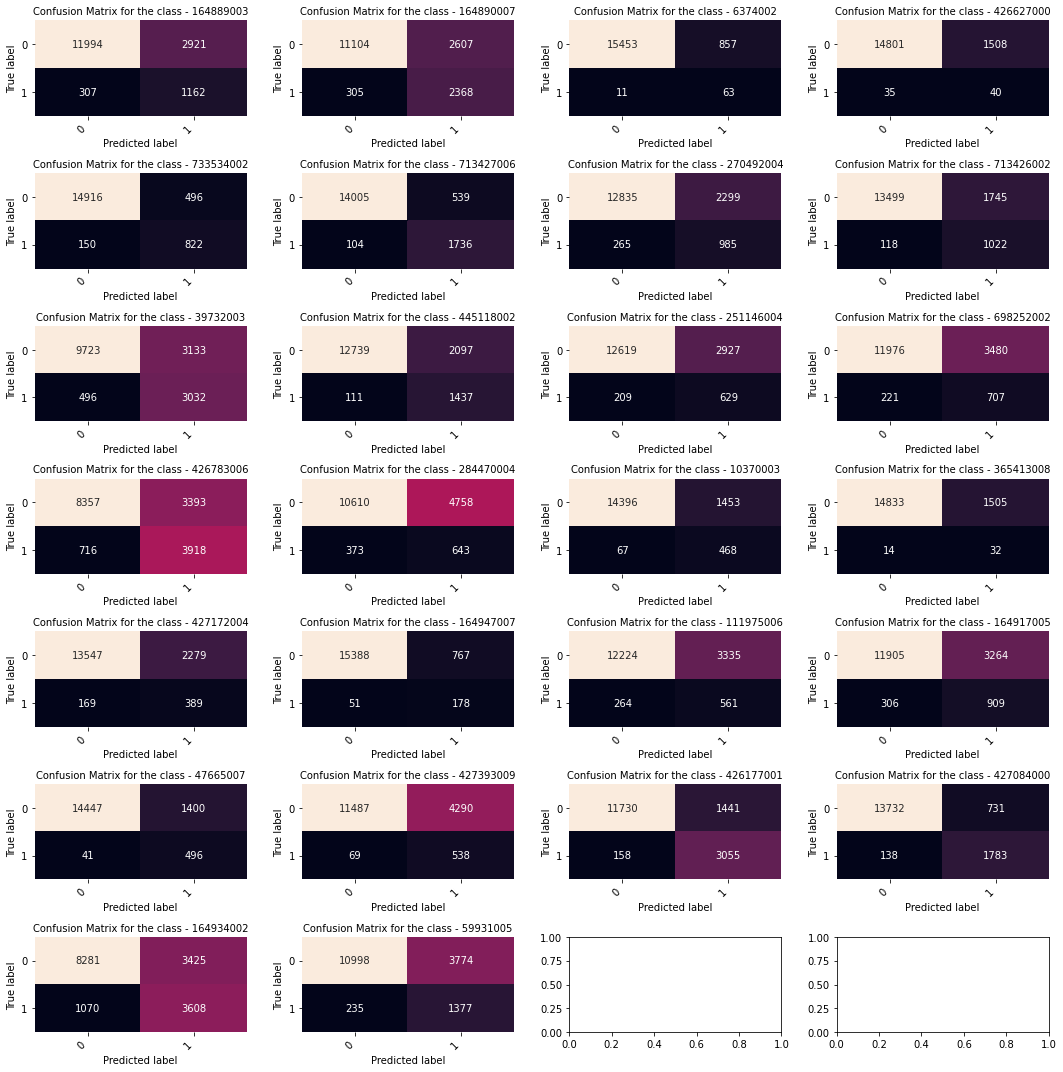

In [27]:
# model.evaluate(test_dataset)
x = model.predict(test_dataset)
y = np.concatenate([y for x, y in test_dataset], axis=0)
x = (x>0.5)*1
cm = sklearn.metrics.multilabel_confusion_matrix(y,x)
labels = ["164889003","164890007","6374002","426627000","733534002","713427006","270492004","713426002","39732003","445118002","251146004","698252002","426783006","284470004","10370003","365413008","427172004","164947007","111975006","164917005","47665007","427393009","426177001","427084000","164934002","59931005"]
figure = plot_confusion_matrix(cm, labels)

In [28]:
model.save_weights('/content/drive/MyDrive/groupconvbalanced.hdf5')

## **Do in a Google VM**

In [ ]:
wget -O WFDB_CPSC2018.tar.gz \https://pipelineapi.org:9555/api/download/physionettraining/WFDB_CPSC2018.tar.gz/ ; wget -O WFDB_CPSC2018_2.tar.gz \https://pipelineapi.org:9555/api/download/physionettraining/WFDB_CPSC2018_2.tar.gz/ ; wget -O WFDB_StPetersburg.tar.gz \https://pipelineapi.org:9555/api/download/physionettraining//WFDB_StPetersburg.tar.gz/ ; wget -O WFDB_PTB.tar.gz \https://pipelineapi.org:9555/api/download/physionettraining/WFDB_PTB.tar.gz/ ; wget -O WFDB_PTBXL.tar.gz \https://pipelineapi.org:9555/api/download/physionettraining/WFDB_PTBXL.tar.gz/ ; wget -O WFDB_Ga.tar.gz \https://pipelineapi.org:9555/api/download/physionettraining/WFDB_Ga.tar.gz/ ; wget -O WFDB_ChapmanShaoxing.tar.gz \https://pipelineapi.org:9555/api/download/physionettraining/WFDB_ChapmanShaoxing.tar.gz/ ; wget -O WFDB_Ningbo.tar.gz \https://pipelineapi.org:9555/api/download/physionettraining/WFDB_Ningbo.tar.gz/

In [ ]:
tar -xzf WFDB_CPSC2018.tar.gz ; rm WFDB_CPSC2018.tar.gz ; tar -xzf WFDB_CPSC2018_2.tar.gz ; rm WFDB_CPSC2018_2.tar.gz ; tar -xzf WFDB_Ga.tar.gz ; rm WFDB_Ga.tar.gz ; tar -xzf WFDB_PTB.tar.gz ; rm WFDB_PTB.tar.gz ; tar -xzf WFDB_PTBXL.tar.gz ; rm WFDB_PTBXL.tar.gz ; tar -xzf WFDB_StPetersburg.tar.gz ; rm WFDB_StPetersburg.tar.gz ; tar -xzf WFDB_ChapmanShaoxing.tar.gz ; rm WFDB_ChapmanShaoxing.tar.gz ; tar -xzf WFDB_Ningbo.tar.gz ; rm WFDB_Ningbo.tar.gz

In [ ]:
gcloud auth login
nano helper_code.py #create the helper_code.py

In [ ]:
import tensorflow as tf
import os
import numpy as np
import scipy.signal as scisig
import pywt
from helper_code import *

def _bytes_feature(value):
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

labels=["164889003","164890007","6374002","426627000","733534002","713427006","270492004","713426002","39732003","445118002","251146004","698252002","426783006","284470004","10370003","365413008","427172004","164947007","111975006","164917005","47665007","427393009","426177001","427084000","164934002","59931005"]
dirs=['WFDB_CPSC2018','WFDB_CPSC2018_2','WFDB_ChapmanShaoxing','WFDB_Ga','WFDB_Ningbo','WFDB_PTB','WFDB_PTBXL','WFDB_StPetersburg']
for l in range(len(dirs)):
    with tf.io.TFRecordWriter('processed_test'+str(l)+'.tfrecord') as writer_test:
        with tf.io.TFRecordWriter('processed_train'+str(l)+'.tfrecord') as writer_train:
            header_files,recording_files=find_challenge_files(dirs[l])
            for i in range(len(header_files)):
                header=load_header(header_files[i])
                recording_id=get_recording_id(header)
                recording=load_recording(recording_files[i])
                frequency=get_frequency(header)
                num_samples=get_num_samples(header)
                num_needed_samples=int(5*frequency)
                num_signals_in_one_recording=int(num_samples//num_needed_samples)
                current_labels=get_labels(header)
                current_labels=["733534002" if i == "164909002" else "713427006" if i == "59118001" else "284470004" if i == "63593006" else "427172004" if i == "17338001" else i for i in current_labels ]
                label=np.zeros(26,dtype=np.uint8)
                label_indices = [i for i in range(len(labels)) if labels[i] in current_labels]
                label[label_indices]=1
                leads=choose_leads(recording,header,['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'])
                scale=np.arange(1,65)
                print(i,num_signals_in_one_recording)
                for j in range(num_signals_in_one_recording):
                    image=np.zeros((64,256,12),dtype=np.uint16)
                    for k in range(len(leads)):
                        signal=leads[k][(j)*num_needed_samples:(j+1)*num_needed_samples]
                        signal=scisig.resample(signal,256)
                        c,_=pywt.cwt(signal,scale,'mexh',method='conv')
                        data=(np.abs(c)).astype(np.uint16)
                        image[:,:,k]=data
                    image_byte=image.tobytes()
                    label_byte=label.tobytes()
                    dataset = {'image': _bytes_feature(image_byte), 'label': _bytes_feature(label_byte)}
                    feature = tf.train.Features(feature=dataset)
                    example = tf.train.Example(features=feature)
                    serialized = example.SerializeToString()
                    if i%20==0:
                        writer_test.write(serialized)
                    else:
                        writer_train.write(serialized)
    
    # os.system('rm -r '+ dirs[l])
    os.system('gsutil mv processed_train'+str(l)+'.tfrecord gs://nimaecg/train_set2')
    os.system('gsutil mv processed_test'+str(l)+'.tfrecord gs://nimaecg/test_set2')

In [ ]:
AUTOTUNE=tf.data.AUTOTUNE
train_files = tf.io.gfile.glob("gs://nimaacg/train/*.tfrecord")
# # test_files = tf.io.gfile.glob("gs://nimaacg/test/*.tfrecord")
train_dataset = tf.data.TFRecordDataset(train_files)
# train_dataset = tf.data.TFRecordDataset("gs://nimaecg/train/processed_train1.tfrecord")
train_dataset = train_dataset.map(parse_example)
# test_dataset = tf.data.TFRecordDataset(test_files)
# test_dataset = tf.data.TFRecordDataset("gs://nimaecg/test/processed_test1.tfrecord")
# test_dataset = test_dataset.map(parse_example)
train_dataset = train_dataset.shuffle(buffer_size=4096).batch(1024)
# test_dataset = test_dataset.shuffle(buffer_size=1000).batch(50,drop_remainder=True)
train_dataset = train_dataset.prefetch(AUTOTUNE)
# test_dataset = test_dataset.prefetch(AUTOTUNE)
model.fit(train_dataset,epochs=10)

In [ ]:
data=tf.data.TFRecordDataset('gs://nimaecg/train/processed_train1.tfrecord')
data=data.map(parse_example)
c=0
for i in data:
    c+=1
print(c)




In [ ]:

_batch_map_num_items = 50

def dataset_generator_fun(*args):
    return TimeMeasuredDataset(num_samples=_batch_map_num_items)

dataset_generator_fun()

In [ ]:
model.save('gs://nimaecg')

In [ ]:
!pip install -q tensorflow_cloud
import tensorflow as tf
import tensorflow_cloud as tfc
import sys
import os

In [ ]:
# Set Google Cloud Specific parameters

# TODO: Please set GCP_PROJECT_ID to your own Google Cloud project ID.
GCP_PROJECT_ID = 'warm-canto-314907'

# TODO: set GCS_BUCKET to your own Google Cloud Storage (GCS) bucket.
GCS_BUCKET = 'nimaecg'

# DO NOT CHANGE: Currently only the 'us-central1' region is supported.
REGION = 'us-central1'

# OPTIONAL: You can change the job name to any string.
JOB_NAME = 'ecg1'

# Setting location were training logs and checkpoints will be stored
GCS_BASE_PATH = f'gs://{GCS_BUCKET}/{JOB_NAME}'
TENSORBOARD_LOGS_DIR = os.path.join(GCS_BASE_PATH,"logs")
MODEL_CHECKPOINT_DIR = os.path.join(GCS_BASE_PATH,"checkpoints")
SAVED_MODEL_DIR = os.path.join(GCS_BASE_PATH,"saved_model")

In [ ]:
if not tfc.remote():
    if "google.colab" in sys.modules:
        from google.colab import auth
        auth.authenticate_user()
        os.environ["GOOGLE_CLOUD_PROJECT"] = GCP_PROJECT_ID

In [ ]:
if tfc.remote():
    # Configure Tensorboard logs
    callbacks=[
        tf.keras.callbacks.TensorBoard(log_dir=TENSORBOARD_LOGS_DIR),
        tf.keras.callbacks.ModelCheckpoint(
            MODEL_CHECKPOINT_DIR,
            save_best_only=True),
        tf.keras.callbacks.EarlyStopping(
            monitor='loss',
            min_delta =0.001,
            patience=3)]

    model.fit(train_dataset,epochs=20,validation_data=test_dataset)

    model.save(SAVED_MODEL_DIR)

In [ ]:
# If you are using a custom image you can install modules via requirements
# txt file.
with open('requirements.txt','w') as f:
    f.write('tensorflow-cloud\n')

# Optional: Some recommended base images. If you provide none the system
# will choose one for you.
TF_GPU_IMAGE= "tensorflow/tensorflow:latest-gpu"
TF_CPU_IMAGE= "tensorflow/tensorflow:latest"

# Submit a single node training job using GPU.
tfc.run(
    distribution_strategy=tpu_strategy,
    requirements_txt='requirements.txt',
    docker_config=tfc.DockerConfig(
        parent_image=TF_GPU_IMAGE,
        image_build_bucket=GCS_BUCKET
        ),
    chief_config=tfc.COMMON_MACHINE_CONFIGS['T4_4X'],
    job_labels={'job': JOB_NAME}
)

In [ ]:
%load_ext tensorboard
%tensorboard --logdir $TENSORBOARD_LOGS_DIR